# Hunting exoplanets with Machine Learning
### Inteligencia Artificial para los Sistemas de Control Autónomos
### Máster de Ciencia y Tecnología desde el Espacio


## Objectives

- Deal with a very unbalanced dataset.
- Deal with high-dimensional data.
- Hyperparameter optimization with grid and random search.
- Feature engineering.
- Anomaly detection?

## Introduction

Blablabla.

Remember that the workflow usually implemented in ML projects is as follows.

1. Data adquisition
2. Exploratory analysis
3. Data preprocessing
4. Model training
5. Model validation


## Libraries import

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

## Data adquisition

In this case the dataset comes in two separate files, one for training and one for valication. This is a rather common practice in complex datasets published in public repositories.

In [ ]:
train_df = pd.read_csv("exoTrain.zip")
test_df = pd.read_csv("exoTest.zip")

In [ ]:
train_df.shape

In [ ]:
test_df.shape

In [ ]:
train_df.columns

In [ ]:
train_df.info()

In [7]:
train_df['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [8]:
test_df['LABEL'].value_counts()

1    565
2      5
Name: LABEL, dtype: int64

We observe that this dataset is:
* Very unbalanced, with 5050 stars without exoplanet versus only 37 with exoplanet!.
* High-dimensional problem with 3197 dimensions.
* The label is given with a number (one or two) instead of a string.
* The dataset is actually a univariable time-series, and thus our task is time-series classification.
* The dataset occupies 124.1 MB, which is not too much, but it's little either.
* There are only five exoplanets in the test set!

How can we handle this problem?
* Just like another classification task.
* Oversampling the minority class.
* Subsampling the majority class.
* Creating new samples from the minority class.
* Better performance measures.


## Exploratory Data Analysis

In [9]:

## THIS EDA IS AN EXERCISE
## YOUR CODE HERE


In [10]:
train_df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [11]:
train_df.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


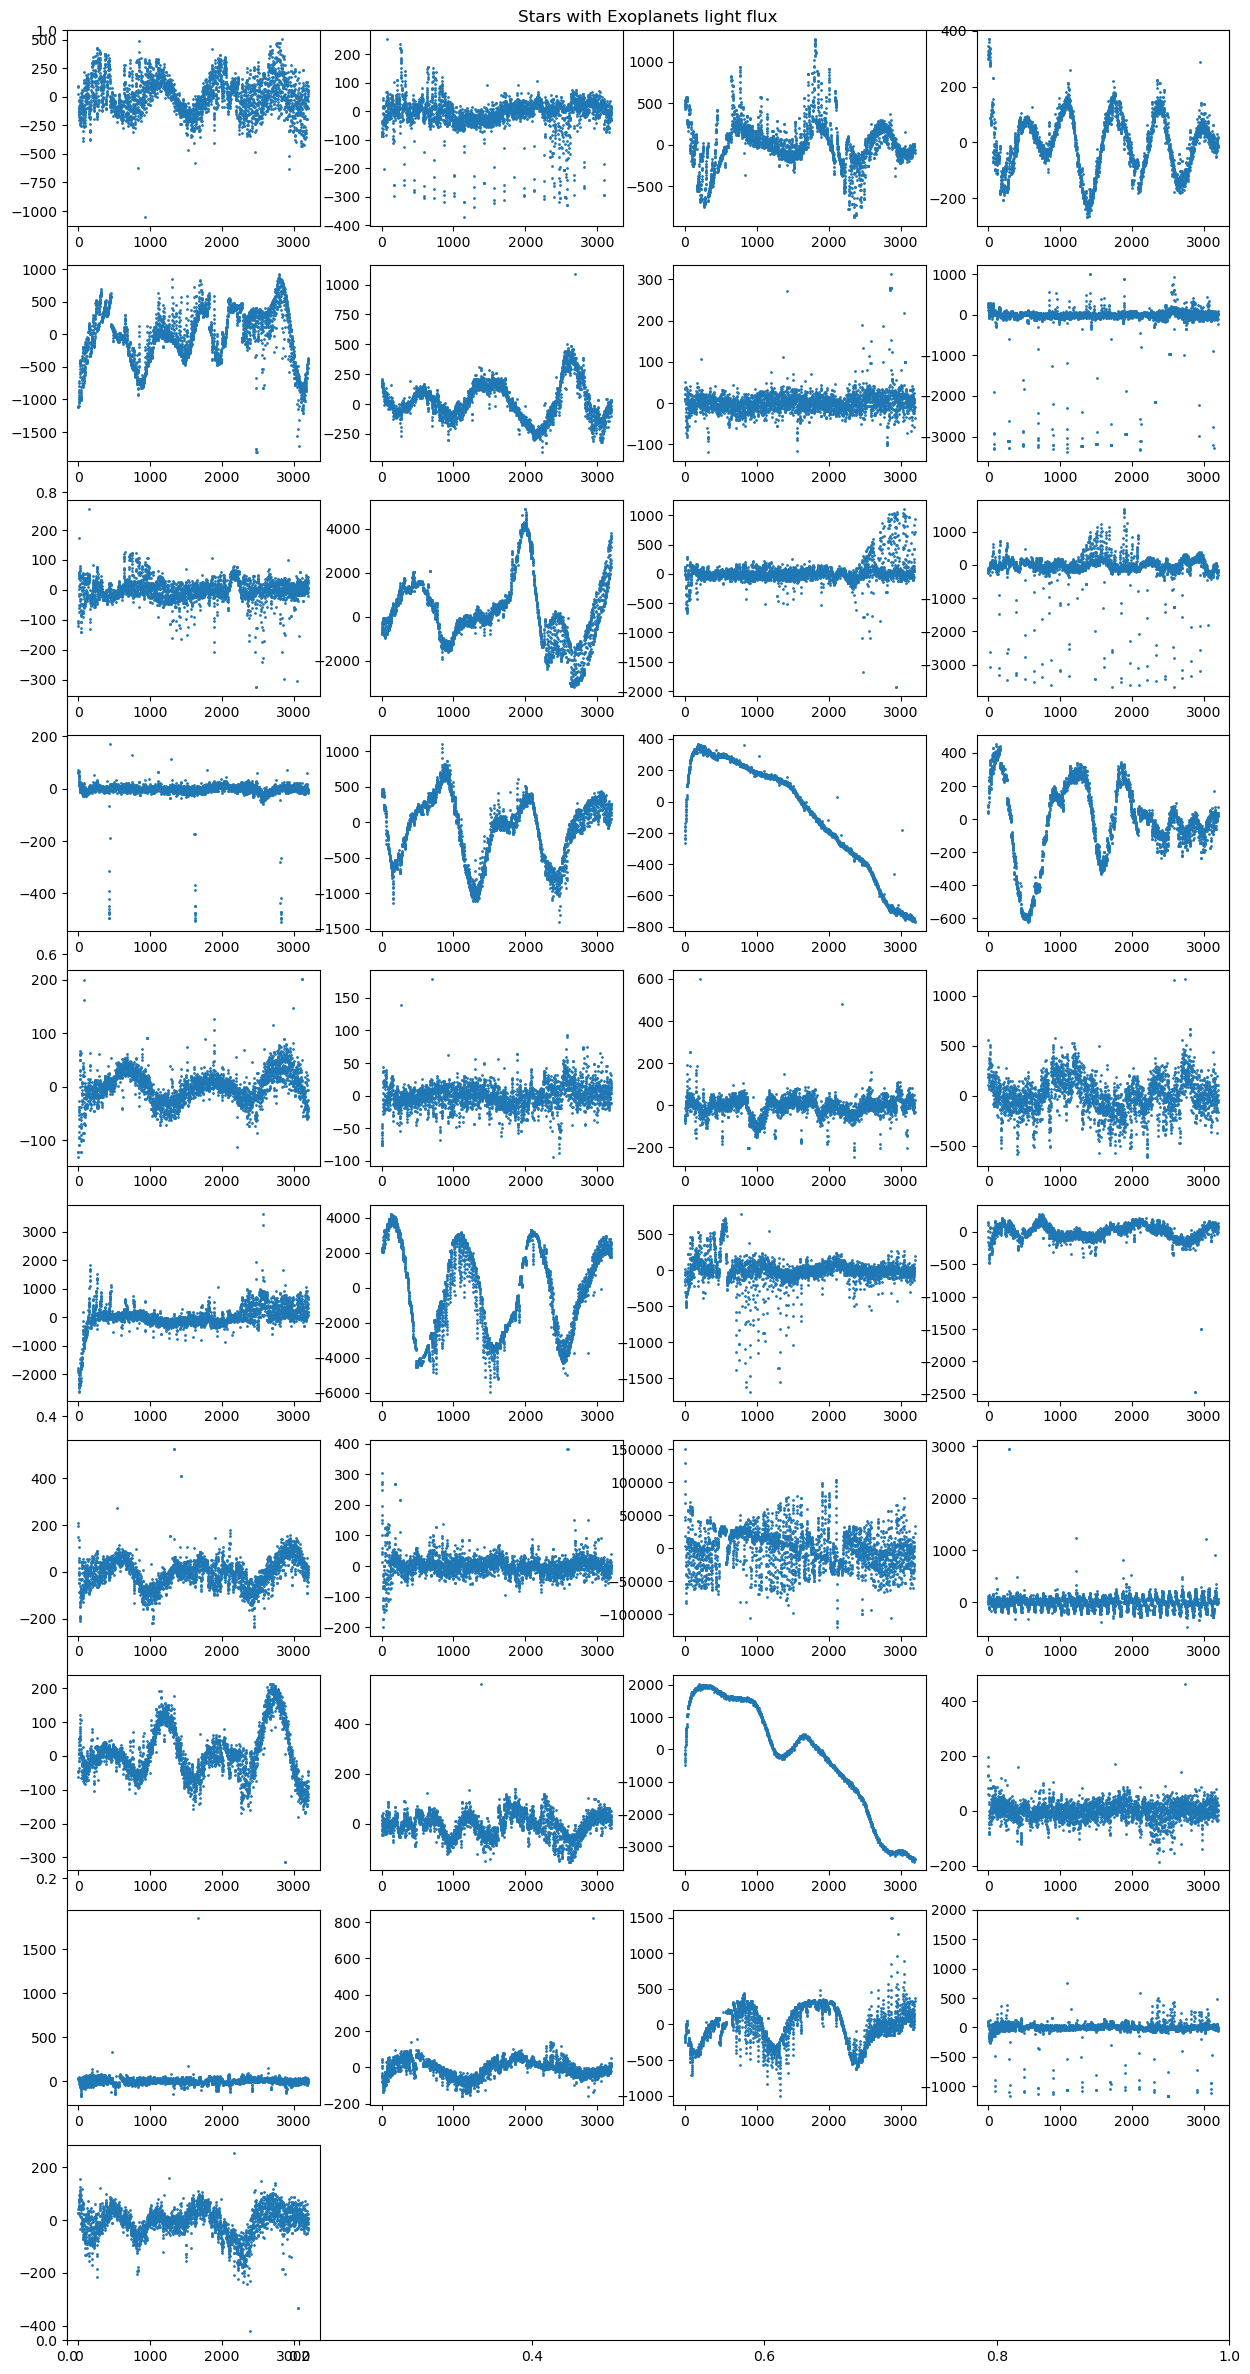

In [13]:
fig = plt.figure(figsize=(15,30))
plt.title('Stars with Exoplanets light flux')

for i in range(37):
    ax = fig.add_subplot(10, 4, i+1)
    ax.scatter(np.arange(3197), train_df[train_df['LABEL']==2].iloc[i, 1:], s=1)

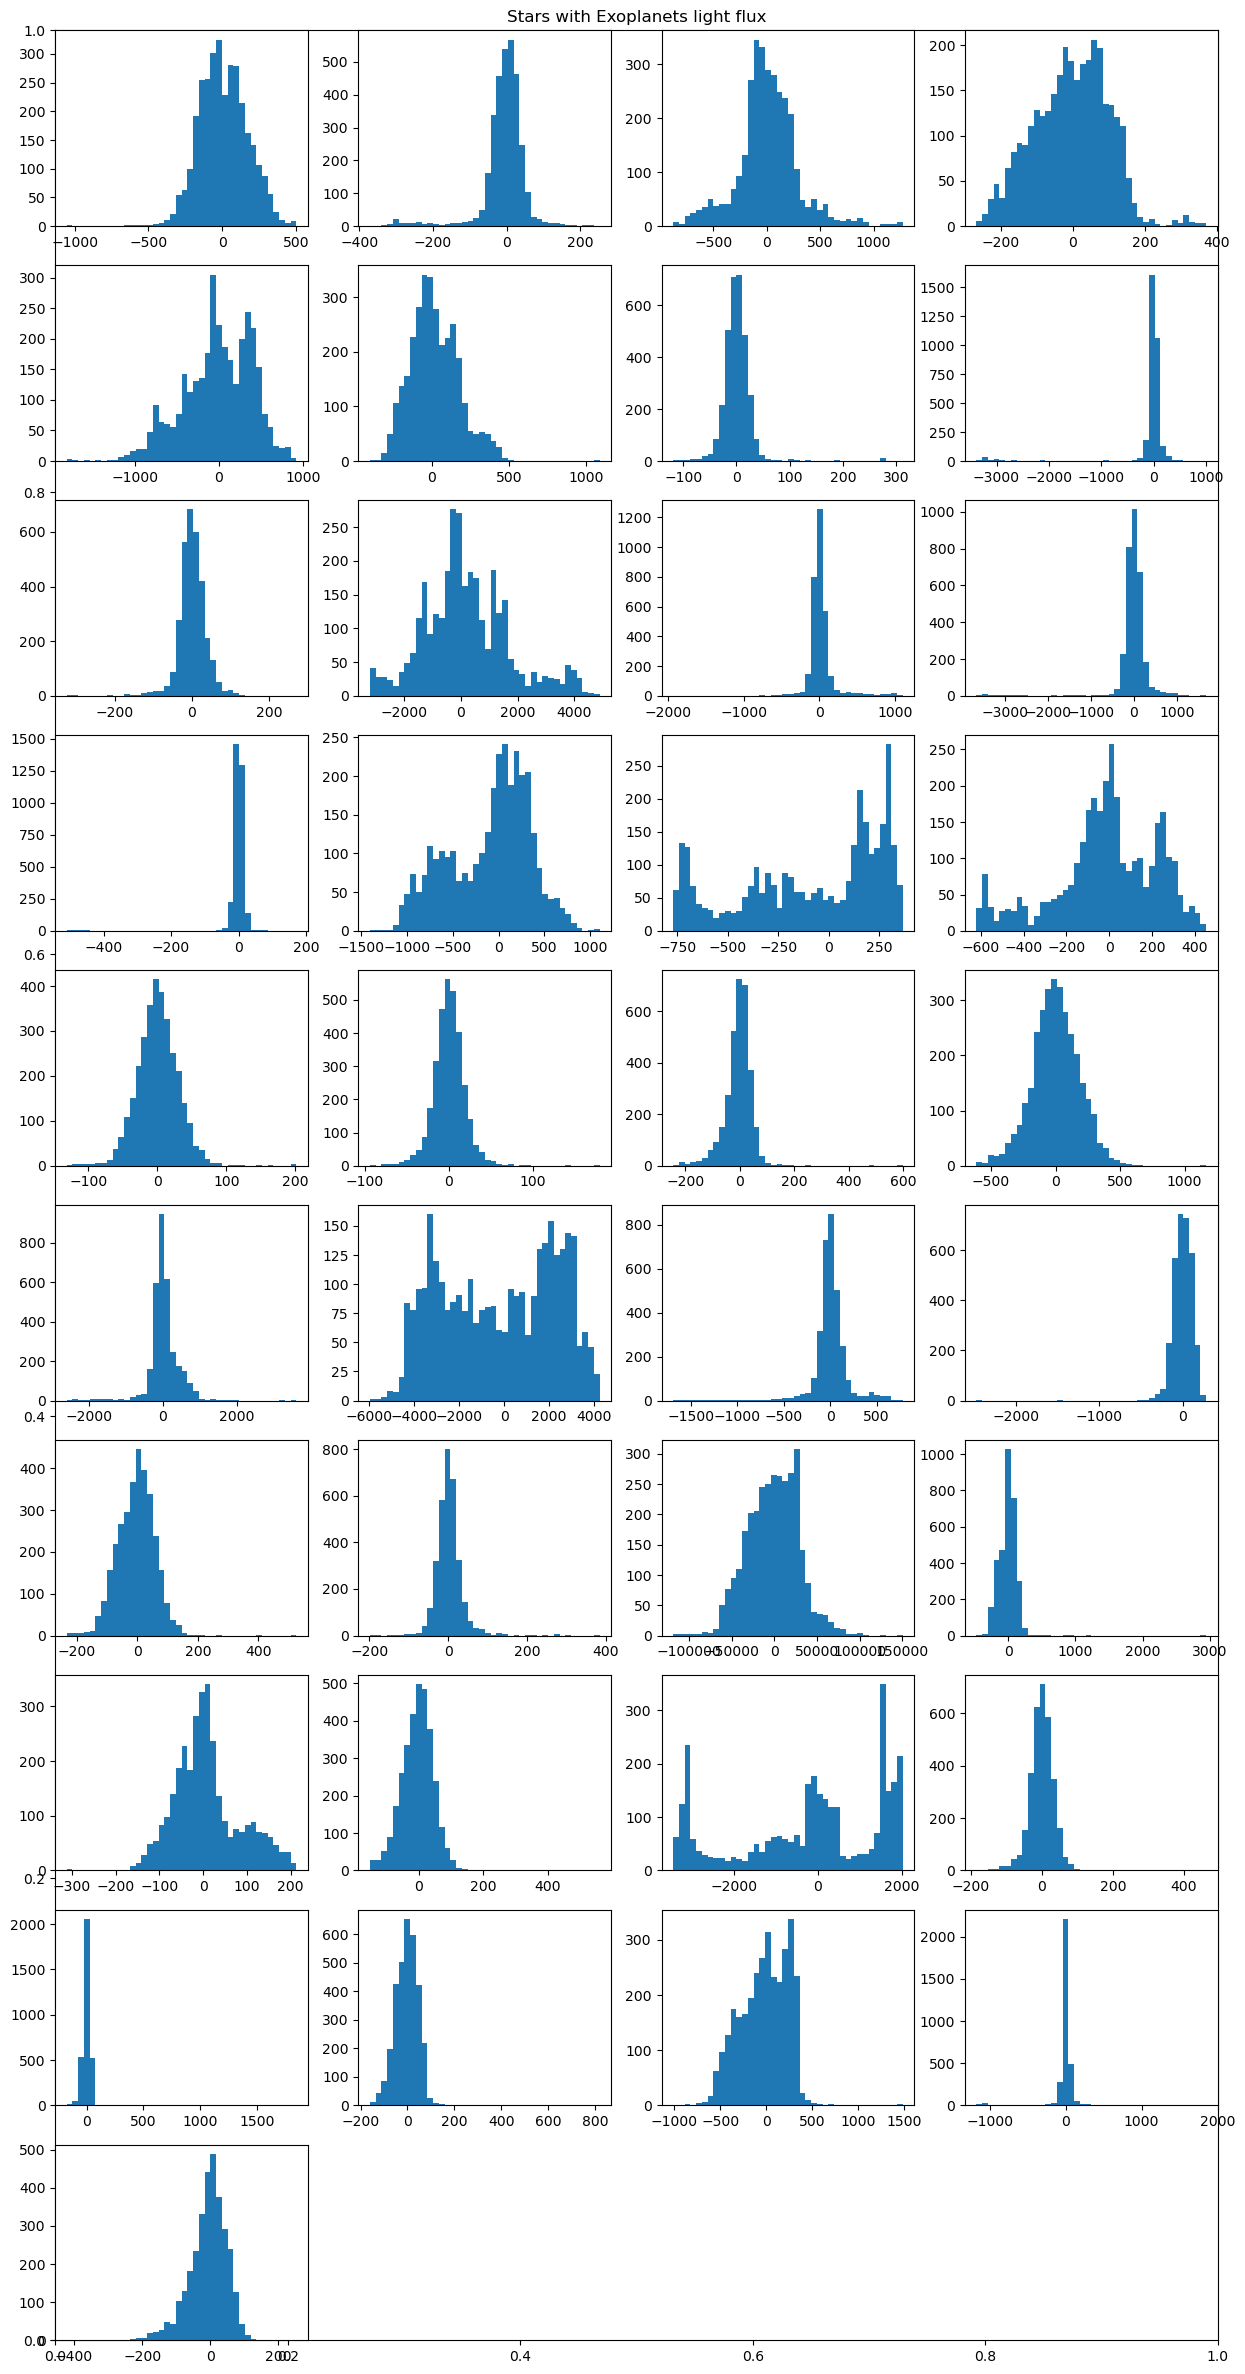

In [14]:
fig = plt.figure(figsize=(15,30))
plt.title('Stars with Exoplanets light flux')

for i in range(37):
    ax = fig.add_subplot(10, 4, i+1)
    ax.hist(train_df[train_df['LABEL']==2].iloc[i, 1:], bins=40)

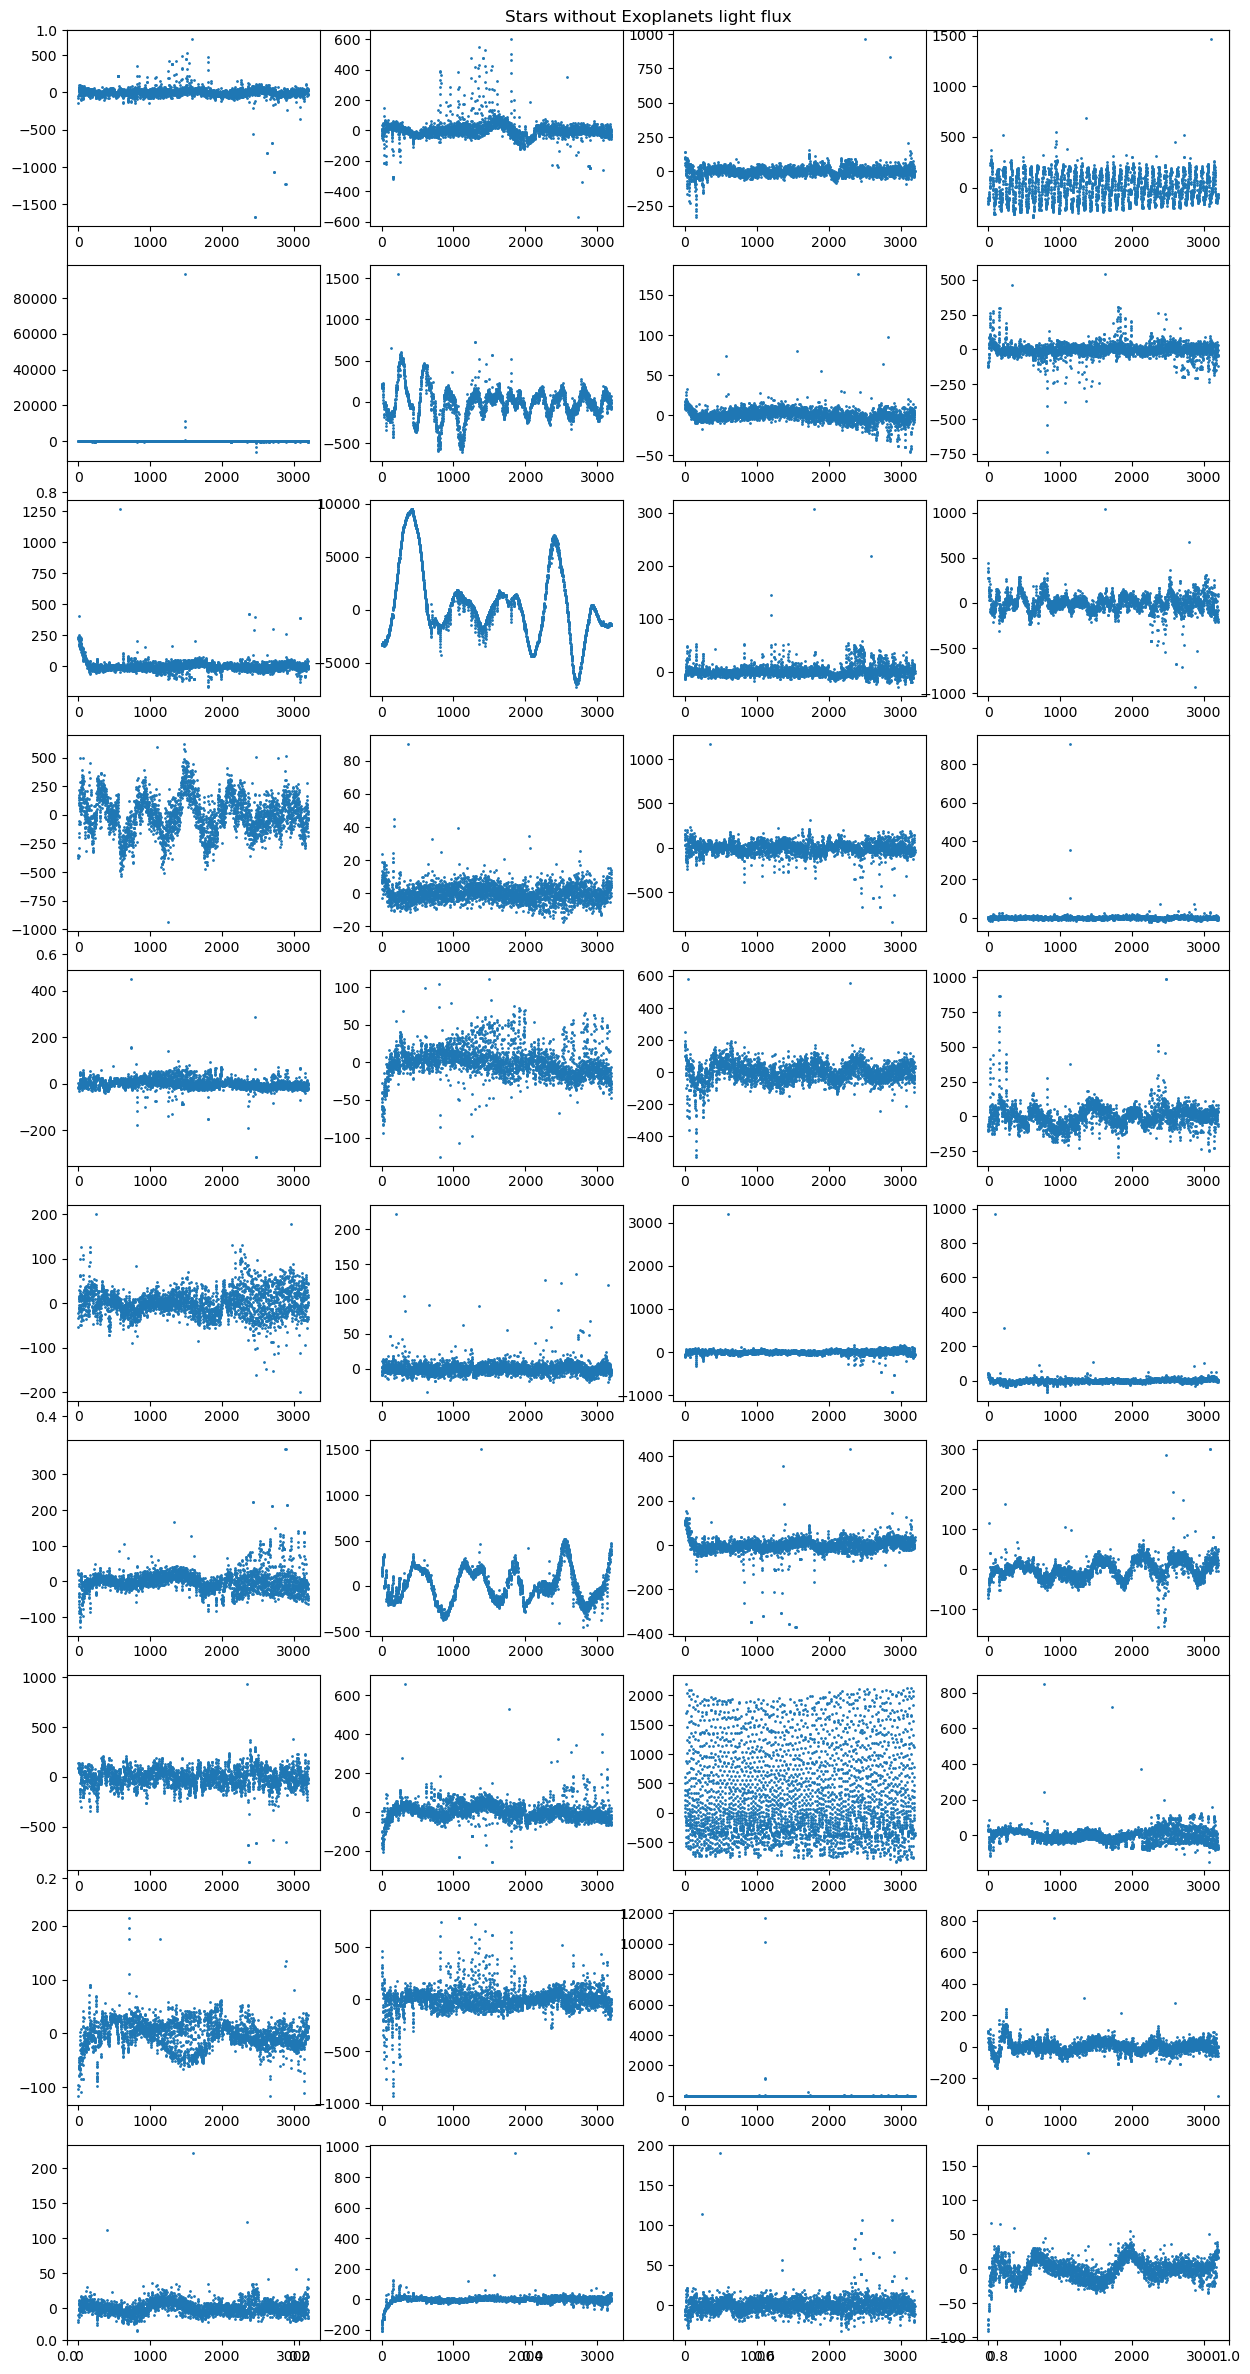

In [15]:
fig = plt.figure(figsize=(15,30))
plt.title('Stars without Exoplanets light flux')

for i in range(40):
    ax = fig.add_subplot(10, 4, i+1)
    ax.scatter(np.arange(3197), train_df[train_df['LABEL']==1].iloc[i, 1:], s=1)

In [16]:
trainExo = train_df[train_df['LABEL']==1].iloc[:,1:].T[:100]
trainNoExo = train_df[train_df['LABEL']==2].iloc[:,1:].T

print(trainExo.shape)
print(trainNoExo.shape)

from sklearn.preprocessing import StandardScaler

#scaler = MinMaxScaler()
#scaler.fit(trainExo)
#scaled = scaler.fit_transform(trainExo)
#trainExo = pd.DataFrame(scaled, columns=trainExo.columns)

#scaled = scaler.fit_transform(trainNoExo)
#trainNoExo = pd.DataFrame(scaled, columns=trainNoExo.columns)

#del scaled

(100, 5050)
(3197, 37)


In [17]:
exoStatistics = pd.DataFrame()
exoStatistics['mean'] = trainExo.mean()
exoStatistics['median'] = trainExo.median()
exoStatistics['min'] = trainExo.min()
exoStatistics['max'] = trainExo.max()
exoStatistics['std'] = trainExo.std()
exoStatistics['kurtosis'] = trainExo.kurtosis()
exoStatistics['skewness'] = trainExo.skew()
exoStatistics['label'] = "Exoplanets"

noexoStatistics = pd.DataFrame()
noexoStatistics['mean'] = trainNoExo.mean()
noexoStatistics['median'] = trainNoExo.median()
noexoStatistics['min'] = trainNoExo.min()
noexoStatistics['max'] = trainNoExo.max()
noexoStatistics['std'] = trainExo.std()
noexoStatistics['kurtosis'] = trainNoExo.kurtosis()
noexoStatistics['skewness'] = trainNoExo.skew()
noexoStatistics['label'] = "No exoplanets"

statistics = pd.concat([exoStatistics, noexoStatistics])
statistics.head()

,mean,median,min,max,std,kurtosis,skewness,label
37,14.5214,24.675,-141.22,97.75,48.649671,0.229140,-0.712665,Exoplanets
38,-3.8299,9.195,-218.10,143.98,61.840125,4.392177,-1.826282,Exoplanets
39,2.0795,15.480,-230.71,142.40,72.692844,0.844221,-0.891077,Exoplanets
40,9.2252,-12.995,-259.70,375.18,167.376699,-1.110985,0.278959,Exoplanets
41,66.9144,65.805,-125.62,246.15,99.514018,-0.807339,-0.096461,Exoplanets


In [18]:
statistics.describe()

,mean,median,min,max,std,kurtosis,skewness
count,5.087000e+03,5.087000e+03,5087.000000,5.087000e+03,5050.000000,5087.000000,5087.000000
mean,2.211951e+02,2.239945e+02,-1196.673855,1.881560e+03,774.815558,3.363686,0.426357
std,1.659794e+04,1.710303e+04,22312.163951,4.520996e+04,12099.307904,16.965030,1.590300
min,-1.750244e+05,-1.775330e+05,-892477.410000,-1.134829e+05,1.629754,-1.672488,-8.901121
25%,-7.537250e+00,-6.932500e+00,-211.870000,3.282500e+01,13.844825,-0.473910,-0.321063
50%,3.452000e-01,-1.050000e-01,-70.970000,9.409000e+01,39.970086,0.154424,0.164633
75%,1.440240e+01,1.171500e+01,-23.935000,2.853600e+02,112.297847,1.403422,0.726422
max,1.084301e+06,1.163364e+06,580497.500000,2.608142e+06,541740.232313,834.933709,20.555620


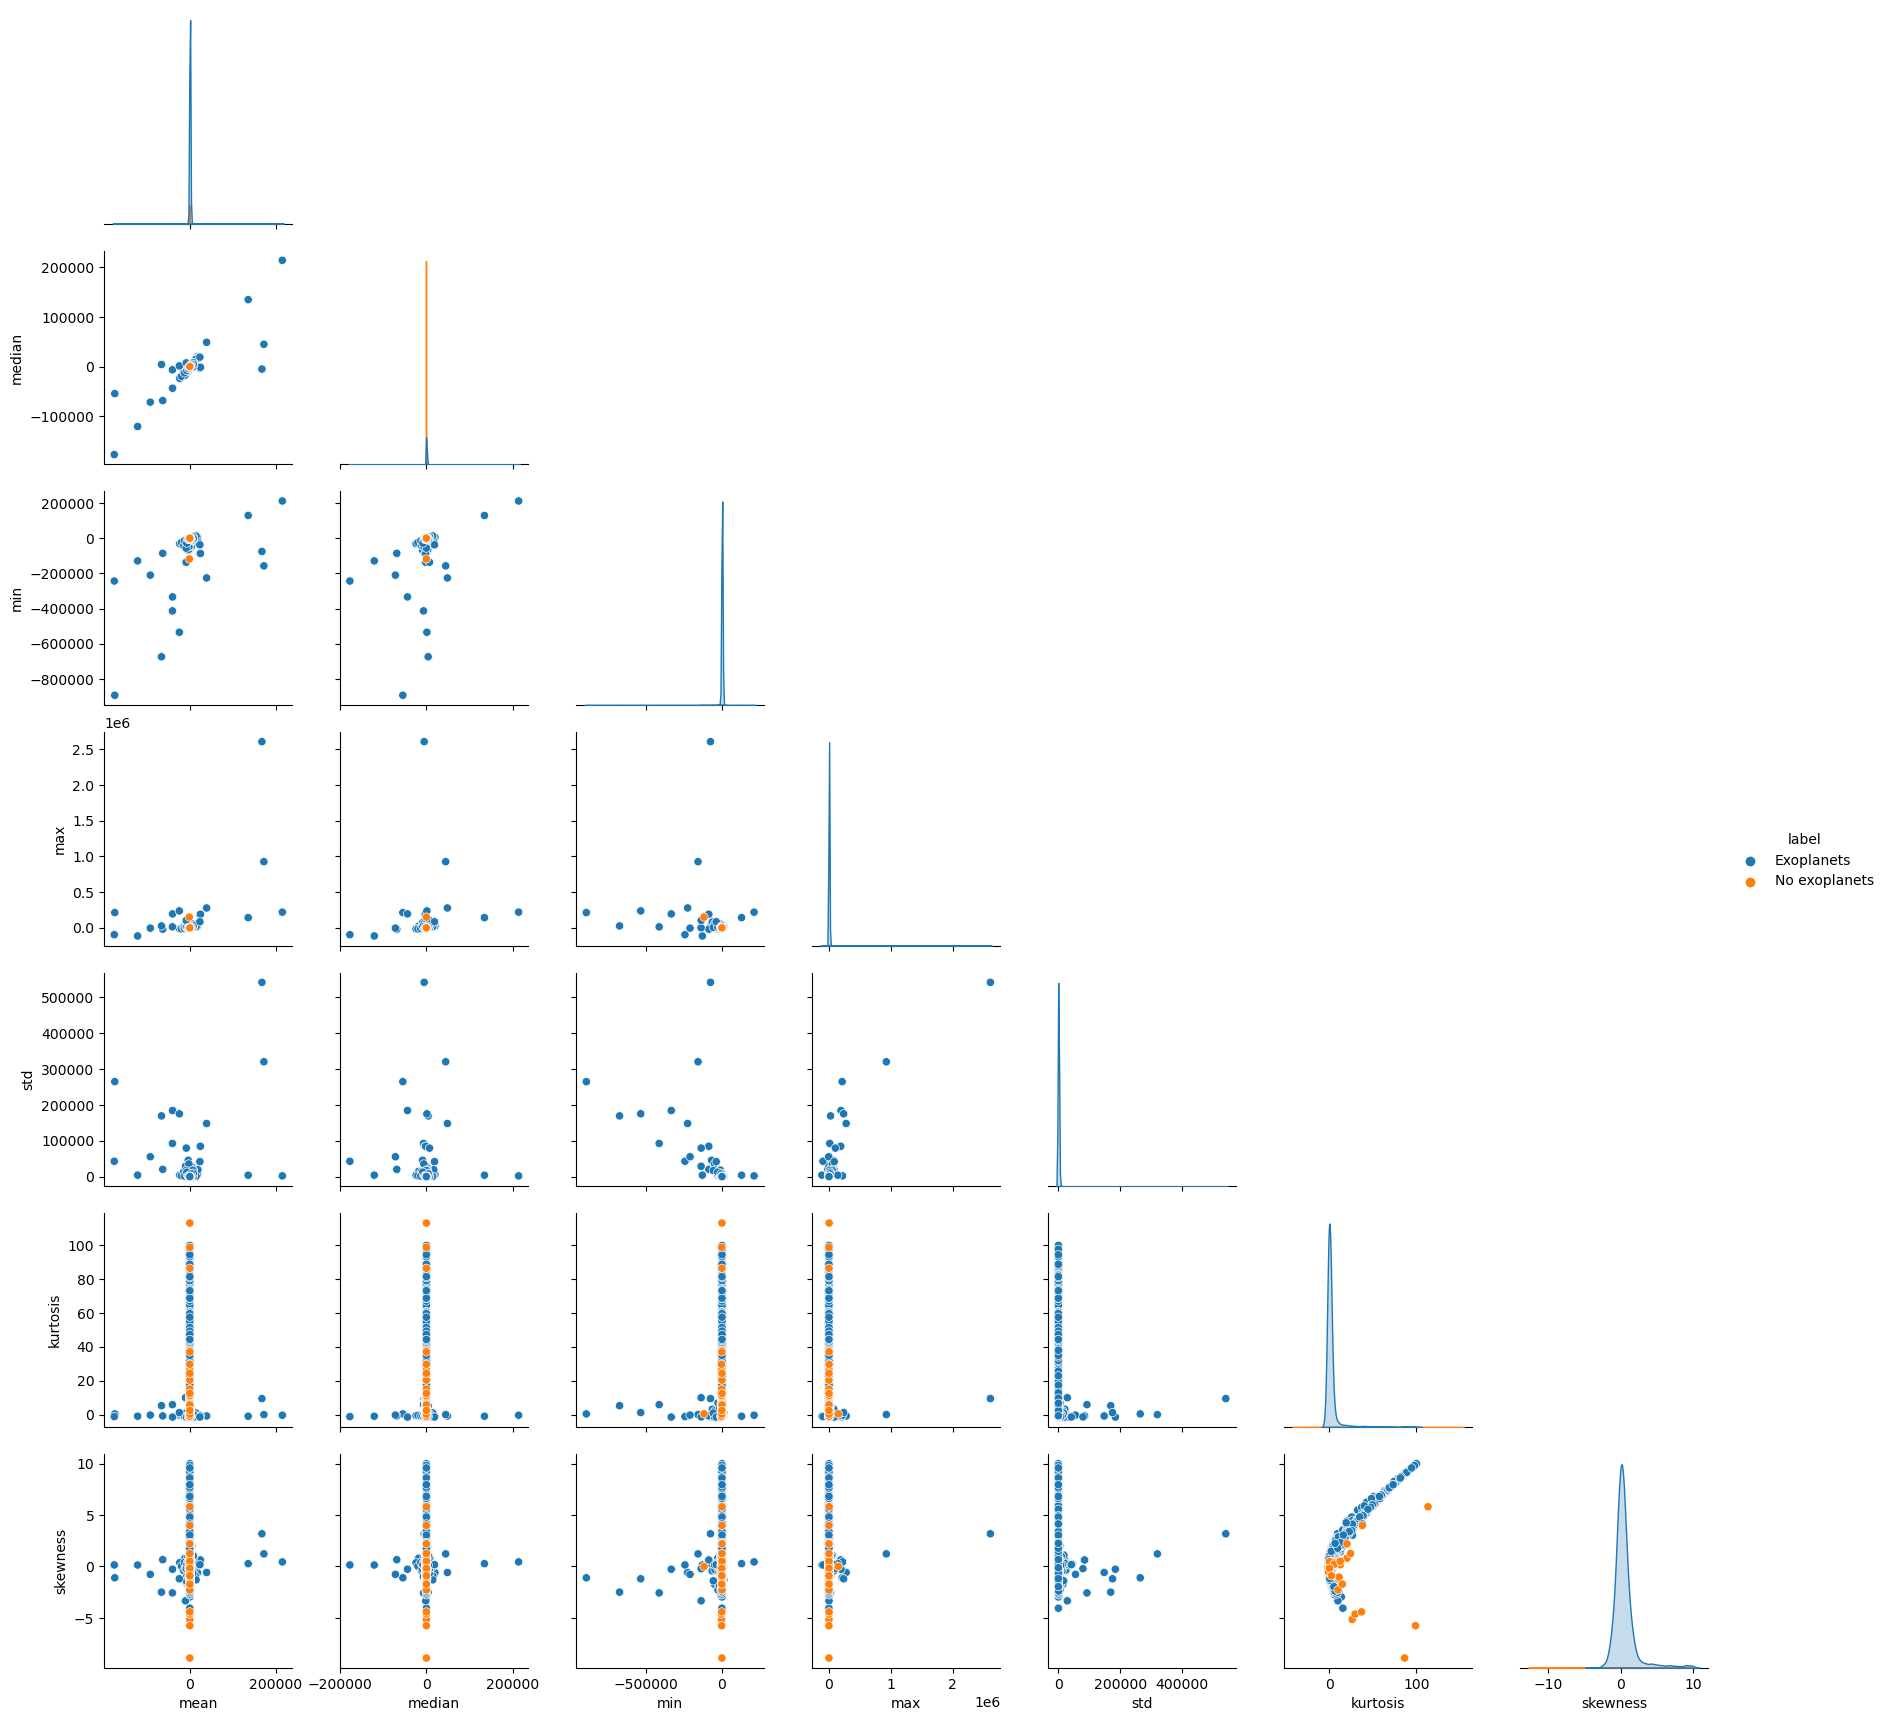

In [19]:
sns.pairplot(statistics[(statistics['mean']<1e6) & (statistics['kurtosis']<500)], hue="label", corner=True)

Check the existence of nans and nulls, this is no so trivial because of the number of attributes.

In [20]:
a = train_df.iloc[:,1:].apply(lambda x : x.isna().sum())

print(a[a > 0])

Series([], dtype: int64)


Given the high dimensionality of this problem, it pays off to study how much of that information is linearly dependent, it can be done with PCA.

In [21]:
print(train_PCA['LABEL'].value_counts())

NameError: name 'train_PCA' is not defined

The conclusion should be that the dataset is perfecty balanced with 11 classes, clean, without outlayers and valid for predictive modeling.

## Preprocess data


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [23]:
X_train = train_df.drop("LABEL", axis=1)
X_test = test_df.drop("LABEL", axis=1)
y_train = train_df['LABEL']
y_test = test_df['LABEL']

#X = X_train
#y = y_train

# Given the size of the dataset, we delete unnecesary dataframes
#del train_df
#del test_df

#
# Clean your data, if needed
# Store your clean data in train_clean
# 
# YOUR CODE HERE


Now we standarize our data.

In [24]:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(X_train)
#X = scaler.transform(X_train)

We split our data into train and test datasets.

In [25]:
#from sklearn.model_selection import train_test_split 
    
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#print(f"X shape: {X.shape}")
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: (5087, 3197)
X_test shape: (570, 3197)


## Phase 1: Baseline

### Set up a baseline

In [26]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
y_model = dummy_clf.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_model)

0.9912280701754386

In [28]:
from sklearn.metrics import recall_score

recall_score(y_test, y_model)

1.0

In [29]:
y_model[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [30]:
from sklearn.metrics import f1_score

f1_score(y_test, y_model, average='macro')

0.4977973568281938

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_model, zero_division=1, target_names=["Exoplanet", "No exoplanet"]))

              precision    recall  f1-score   support

   Exoplanet       0.99      1.00      1.00       565
No exoplanet       1.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       1.00      0.50      0.50       570
weighted avg       0.99      0.99      0.99       570



#### Logistic regression

In [32]:
def evaluateModel(model, X_test, y_test):
    y_model = dummy_clf.predict(X_test)
    acc = accuracy_score(y_test, y_model)
    rec = recall_score(y_test, y_model)
    f1 = f1_score(y_test, y_model, average='macro')
    
    print(classification_report(y_test, y_model, target_names=["Exoplanet", "No exoplanet"]))

In [33]:
from sklearn.svm import SVC

logistic = SVC()
logistic.fit(X_train, y_train)

SVC()

In [34]:
y_model[:10]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [35]:
evaluateModel(logistic, X_test, y_test)

              precision    recall  f1-score   support

   Exoplanet       0.99      1.00      1.00       565
No exoplanet       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/david/anaconda3/envs/ml37/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Exercise

1. Buscar información sobre curvas ROC y la métrica AUC e interpreta la siguiente figura.

In [ ]:
from sklearn.metrics import RocCurveDisplay

a = RocCurveDisplay.from_estimator(logistic, X_test, y_test)

<< YOUR ANSWER HERE >>

2. ¿Cómo es la curva ROC de un clasificador perfecto?

<< YOUR ANSWER HERE >>

## Predictive modelling: phase 2 - Better preprocessing

#### Remove outlayers

In [ ]:
fig, axes = plt.subplots(3, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

print(type(train_df))

for i in range(0, 3):
    for j in range(0,5):
        sns.boxplot(ax=axes[i,j], data=train_df, x='LABEL', y='FLUX.1')

In [ ]:
train_df_clean = train_df.drop(train_df[train_df['FLUX.1']>200000].index, axis=0)

In [ ]:
fig, axes = plt.subplots(3, 5,figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

print(type(train_df))

for i in range(0, 3):
    for j in range(0,5):
        sns.boxplot(ax=axes[i,j], data=train_df_clean, x='LABEL', y='FLUX.'+str((j+1)+5*i))

#### Data normalization

In [ ]:
train_df_clean.mean()

Each instance has a different scale, we should change it.

In [ ]:
X_train_clean = train_df_clean.drop("LABEL", axis=1)
X_test_clean = test_df.drop("LABEL", axis=1)
y_train_clean = train_df_clean['LABEL']
y_test_clean = test_df['LABEL']

In [ ]:
from sklearn.preprocessing import normalize

X_train_clean = normalize(X_train_clean)
X_test_clean = normalize(X_test_clean)

In [ ]:
pd.DataFrame(X_train_clean, columns=train_df.columns[1:]).mean()

In [ ]:
#X_train = train_df_clean.drop("LABEL", axis=1)
#X_test = test_df.drop("LABEL", axis=1)
#y_train = train_df_clean['LABEL']
#y_test = test_df['LABEL']

### Gaussian filter

Our data cointains lots of noise, so we apply a filter to clean it up.

In [ ]:
from scipy import ndimage

#X_train_clean = ndimage.filters.gaussian_filter(X_train_clean, sigma=10)
#X_test_clean = ndimage.filters.gaussian_filter(X_test_clean, sigma=10)

In [ ]:
fig = plt.figure(figsize=(15,30))

for i in range(0, 10, 2):
    ax = fig.add_subplot(10, 2, i+1)
    ax.scatter(np.arange(3197), train_df.iloc[i, 1:], s=1)
    ax.set_ylabel(f"Light flux star {i}")
    ax = fig.add_subplot(10, 2, i+2)
    ax.scatter(np.arange(3197), X_train_clean[i,:], s=1, c="red")
    #ax.set_ylabel(f"Normalized light flux star {i}")



In [ ]:
fig = plt.figure(figsize=(15,30))

for i in range(0, 10, 2):
    ax = fig.add_subplot(10, 2, i+1)
    ax.scatter(np.arange(3197), X.iloc[i,:], s=1)
    ax.set_ylabel(f"Light flux star {i}")
    ax = fig.add_subplot(10, 2, i+2)
    ax.scatter(np.arange(3197), X_train_norm.iloc[i,:], s=1, c="red")
    ax.set_ylabel(f"Normalized light flux star {i}")

### Feature scaling

In [ ]:
from sklearn.preprocessing import RobustScaler

X = X_train
y = y_train

scaler = RobustScaler()
train_df_clean = scaler.fit_transform(train_df_clean)
test_df_clean = scaler.fit_transform(test_df_clean)

train_df_clean = pd.DataFrame(train_df_clean, columns=X_train.columns)
test_df_clean = pd.DataFrame(test_df_clean, columns=X_test.columns)

In [ ]:
from sklearn.svm import SVC

logistic = LogisticRegression()
logistic.fit(X_train_clean, y_train_clean)

In [ ]:
evaluateModel(logistic, X_test_clean, y_test)

## Predictive modelling: phase 3 - Hyperparameter optimization

In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit


param_grid = [{'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-4, 4, 20),
    },
    {'penalty' : ['elasticnet'],
      'l1_ratio' : [0, 0.25, 0.5, 0.75, 1]}
    ]

clf = GridSearchCV(LogisticRegression(solver='liblinear'), 
                   param_grid = param_grid, cv = 2, 
                   scoring='f1_macro', verbose=1, 
                   n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train_clean, y_train_clean)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
from sklearn.ensemble import RandomForestClassifier


param_grid = { 
    'n_estimators': [1, 3, 5, 10, 50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8,10],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(RandomForestClassifier(), 
                   param_grid = param_grid, cv = 2, 
                   scoring='f1_macro', verbose=1, 
                   n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train, y_train)

In [ ]:
clf.best_params_

In [ ]:
clf.best_score_

In [ ]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, X_test, y_test)

### Predictive modeling Phase 2: Feature engineering

Let's visualize flux for a system with and without exoplanets.

In [ ]:
exo_df = train_df[train_df['LABEL'] == 2].drop("LABEL", axis=1)
noexo_df = train_df[train_df['LABEL'] == 1].drop("LABEL", axis=1)

print(exo_df.isna().sum())
print(noexo_df.info())

print(exo_df.shape)
print(noexo_df.shape)

In [ ]:
algo = exo_df.iloc[1,1:]

algo.info()

In [ ]:
sns.histplot(algo[10:])

In [ ]:
fig = plt.figure(figsize=(15,40))
plt.title('Stars with Exoplanets')

for i in range(12):
    ax = fig.add_subplot(14, 4, i+1)
    ax.scatter(np.arange(3197), np.array(exo_df.iloc[i,1:]), s=1)

In [ ]:
plt.plot([i + 1 for i in range(exo_df.shape[1])])

In [ ]:
sns.lineplot(data=exo_df.iloc[1, :].T)

## PHASE 3: PCA

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model = KNeighborsClassifier(n_neighbors=1)

print(f"5-CV accuracy estimation: {cross_val_score(model, X, y, cv=5).mean()}")

In [ ]:
# PCA ANALYSIS HERE



from sklearn.decomposition import PCA 

model = PCA(n_components=2)           
model.fit(train_df.drop("LABEL", axis=1)) 
X_2D = model.transform(train_df.drop("LABEL", axis=1))        

train_PCA = pd.DataFrame()
train_PCA['PCA1'] = np.log(X_2D[:, 0]) # We take logs because of the large variance
train_PCA['PCA2'] = np.log(X_2D[:, 1])
train_PCA['LABEL'] = train_df['LABEL']

sns.scatterplot(x="PCA1", y="PCA2", hue="LABEL", style="LABEL", data=train_PCA);
plt.xlabel("log(PCA1)")
plt.ylabel("log(PCA2)")

In [ ]:
pca = PCA().fit(train_df)

plt.plot(np.cumsum(pca.explained_variance_ratio_)[:40])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = PCA(n_components=15)           
model.fit(train_df.drop("LABEL", axis=1)) 
X_2D = model.transform(train_df.drop("LABEL", axis=1))        

train_PCA = pd.DataFrame()
train_PCA['PCA1'] = np.log(X_2D[:, 0]) # We take logs because of the large variance
train_PCA['PCA2'] = np.log(X_2D[:, 1])
train_PCA['LABEL'] = train_df['LABEL']


model = DecisionTreeClassifier()
model.fit(X_2D, y_train)          
#y_model = model.predict(X_test)       

In [ ]:
results['tree'] = accuracy_score(y_test, y_model)

In [ ]:
f1_score(y_test, y_model, average='weighted')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipe = Pipeline([('scaler', StandardScaler()),
 ('pca', PCA(n_components=15)),
 ('clf', DecisionTreeClassifier())])
pipe.fit(X_train, y_train)    
y_model = model.predict(X_test)  

In [ ]:
results['tree'] = accuracy_score(y_test, y_model)